           ID  Longitud  GC (%)
0    J02029h1      1467   51.67
1    D13784h1      1467   50.51
2  AF042071h1      1467   51.26
3    Y14365h2      1461   52.57
4  AF074965h2      1461   51.61


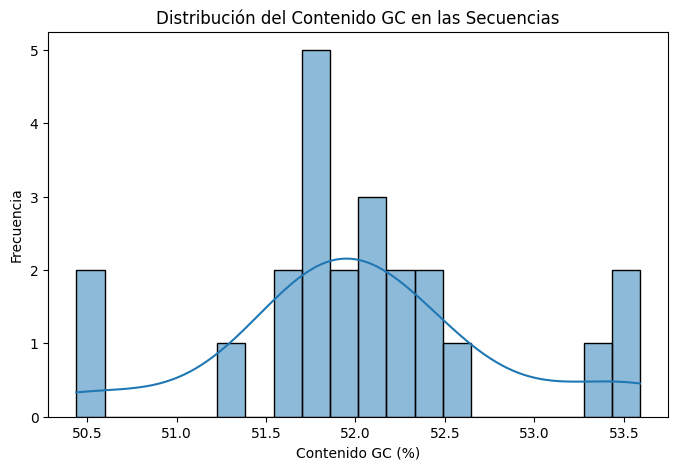

In [3]:
# 1. Importar librerías
from Bio import SeqIO  # Biopython: leer archivos FASTA
import pandas as pd     # pandas: manejar datos
import seaborn as sns   # Seaborn: visualización
import matplotlib.pyplot as plt  # Matplotlib: personalizar gráficos

# 2. Leer el archivo FASTA
registros = list(SeqIO.parse("secuencias.fasta", "fasta"))  # Cargar secuencias

# 3. Calcular contenido GC para cada secuencia
datos = []
for registro in registros:
    secuencia = str(registro.seq).upper()  # Convertir a mayúsculas
    gc = (secuencia.count("G") + secuencia.count("C")) / len(secuencia) * 100
    datos.append({
        "ID": registro.id,
        "Longitud": len(secuencia),
        "GC (%)": round(gc, 2)
    })

# 4. Convertir a DataFrame de pandas
df = pd.DataFrame(datos)
print(df.head())  # Mostrar las primeras filas

# 5. Generar histograma con Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="GC (%)", bins=20, kde=True)
plt.title("Distribución del Contenido GC en las Secuencias")
plt.xlabel("Contenido GC (%)")
plt.ylabel("Frecuencia")
plt.show()
